# Import package

In [1]:
import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Facebook

In [3]:
# Facepager collected facebook post and comment
df_facepager = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Facepager_data.csv')
df_facepager.shape

(51884, 3)

In [4]:
df_facepager.head()

,query_type,message,created_time
0,Facebook:/<page-id>/posts,Keep the party going! 🎉 Final week to get your...,2023-04-29T12:21:49+0000
1,Facebook:/<post-id>/comments,The amount of chillis given by pizzahut for 2 ...,2023-04-29T13:26:05+0000
2,Facebook:/<post-id>/comments,Cutie piessss ❤️,2023-04-29T14:28:13+0000
3,Facebook:/<post-id>/comments,so comel la these 2 kids 🥰,2023-04-29T12:55:17+0000
4,Facebook:/<post-id>/comments,Can McDonald pls take action on this Google Re...,2023-04-30T06:36:10+0000


In [5]:
df_facepager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51884 entries, 0 to 51883
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   query_type    51884 non-null  object
 1   message       51884 non-null  object
 2   created_time  51884 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [6]:
df_facepager["source"]= "facebook"

In [7]:
df_facepager.rename(columns={"message" : "text"}, inplace= True)

In [8]:
df_facepager['query_type'].value_counts()

Facebook:/<post-id>/comments    48784
Facebook:/<page-id>/posts        3100
Name: query_type, dtype: int64

In [9]:
def check_word(row):
    if 'posts' in row:
        return "post"
    else:
        return "comment"
# Apply the function to the 'Text' column
df_facepager['query_type'] = df_facepager['query_type'].apply(check_word)

df_facepager.head()

,query_type,text,created_time,source
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29T12:21:49+0000,facebook
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29T13:26:05+0000,facebook
2,comment,Cutie piessss ❤️,2023-04-29T14:28:13+0000,facebook
3,comment,so comel la these 2 kids 🥰,2023-04-29T12:55:17+0000,facebook
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30T06:36:10+0000,facebook


In [10]:
df_facepager['text'].duplicated().value_counts()

False    51884
Name: text, dtype: int64

In [11]:
df_facepager.isna().sum()

query_type      0
text            0
created_time    0
source          0
dtype: int64

In [12]:
df_facepager.shape

(51884, 4)

## Facepager Project 2

In [13]:
# Facepager collected facebook post and comment
df_facepager_Project2 = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/merged_dataset_Facepager_Project2.csv')
df_facepager_Project2.shape

(99055, 4)

In [14]:
df_facepager_Project2.head()

,query_type,message,created_time,restaurant
0,post,Our outlet at Petronas Bandar Bukit Tinggi is ...,NaN,A&W
1,comment,Renovate pulak… baru nak order waffle 😭,2023-10-01T03:21:35+0000,A&W
2,comment,A&W Kota Kemuning x alert menu yg dipesan...,2023-09-30T11:43:06+0000,A&W
3,comment,Erica Biggs come back 1st Nov 🤣,2023-09-30T12:38:26+0000,A&W
4,comment,Y now only informed? On Msia day it's already...,2023-10-01T19:23:14+0000,A&W


In [15]:
df_facepager_Project2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99055 entries, 0 to 99054
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   query_type    99055 non-null  object
 1   message       99055 non-null  object
 2   created_time  92508 non-null  object
 3   restaurant    99055 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [16]:
df_facepager_Project2["source"]= "facebook Project 2"

In [17]:
df_facepager_Project2.rename(columns={"message" : "text"}, inplace= True)

In [18]:
df_facepager_Project2['query_type'].value_counts()

comment    97385
post        1670
Name: query_type, dtype: int64

In [19]:
df_facepager_Project2['text'].duplicated().value_counts()

False    97591
True      1464
Name: text, dtype: int64

In [20]:
df_facepager_Project2.drop_duplicates(subset=['text'], inplace=True)

In [21]:
df_facepager_Project2.isna().sum()

query_type         0
text               0
created_time    6394
restaurant         0
source             0
dtype: int64

In [22]:
df_facepager_Project2.shape

(97591, 5)

## Dr Chan Dataset

In [23]:
# Read text
df_dr_1 = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/neg.txt', header=None, names=["text"])
df_dr_1.head()

,text
0,perlukan pelukan
1,que me muera
2,"Tidak, mereka tidak memilikinya"
3,bukan kru keseluruhan
4,seluruh tubuh saya berasa gatal dan seperti api


In [24]:
df_dr_2 = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/negative.txt', header=None, names=["text"], encoding = "ISO-8859-1", on_bad_lines='skip')
df_dr_2.head()

,text
0,malam tadi aku tengok.....macam hampeh jer.......
1,wa baru tgk petang tadi ngan housemate wa... c...
2,tak best arr..betapa kejungnya pelakon yg bwk ...
3,aku expect tinggi utk filem nih sebab dulu nan...
4,pada saya X BEST..trailer bukan main lagi..mul...


In [25]:
df_dr_3 = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/pos.txt', header=None, names=["text"])
df_dr_3.head()

,text
0,saya sayang awak adalah yang terbaik! !
1,dia mempunyai kesan ke atas semua orang
2,Terima kasih untuk maklum balas anda . saya su...
3,"ah, selamatkan mr fletcher untuk akhirnya berg..."
4,Saya menjawab kucing bodoh membantu saya menai...


In [26]:
df_dr_4 = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/positive.txt', header=None, names=["text"], delimiter='\t', encoding = "ISO-8859-1", on_bad_lines='skip')
df_dr_4.head()

,text
0,okla citer ni dua bintang daripada lima bintan...
1,upin ipin mmg best...ak tabik ar kt team upin ...
2,mmg best gler citer nie....filem magika nie ba...
3,"crite nie ke, The Amityville Horrormemang beh ..."
4,semalam gi tengok citer Amityville (betul ke d...


In [27]:
df_dr = pd.concat([df_dr_1,df_dr_2,df_dr_3,df_dr_4])
df_dr.head()

,text
0,perlukan pelukan
1,que me muera
2,"Tidak, mereka tidak memilikinya"
3,bukan kru keseluruhan
4,seluruh tubuh saya berasa gatal dan seperti api


In [28]:
df_dr.shape

(101576, 1)

In [29]:
df_dr["source"]= "Dr Dataset"

In [30]:
df_dr['text'].duplicated().value_counts()

False    98823
True      2753
Name: text, dtype: int64

In [31]:
df_dr.drop_duplicates(subset=['text'], inplace=True)

In [32]:
df_dr.isna().sum()

text      0
source    0
dtype: int64

In [33]:
df_dr.shape

(98823, 2)

## Twitter

In [34]:
# Tweepy extracted tweet
df_tweet = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/tweet.csv')
df_tweet.shape

(2752, 3)

In [35]:
df_tweet.head()

,tweet_id,created_at,text
0,1655919663749140481,2023-05-09 12:56:27+00:00,@McDMalaysia NAK
1,1655919583000408072,2023-05-09 12:56:08+00:00,@McDMalaysia yessssss
2,1655919175142113286,2023-05-09 12:54:31+00:00,@PendetaSang @McDMalaysia Kalau ikut hukum asa...
3,1655918498252738560,2023-05-09 12:51:50+00:00,@echelon_crimson @McDMalaysia Pedas yg tak mem...
4,1655918445010223104,2023-05-09 12:51:37+00:00,@McDMalaysia Yessssss &amp; please bring along...


In [36]:
df_tweet["source"]= "twitter"

In [37]:
df_tweet.rename(columns={"created_at" : "created_time"}, inplace= True)

In [38]:
df_tweet = df_tweet [['text', 'source', 'created_time']]

In [39]:
df_tweet['text'].duplicated().value_counts()

True     1561
False    1191
Name: text, dtype: int64

In [40]:
df_tweet.drop_duplicates(subset=['text'], inplace=True)

In [41]:
df_tweet.isna().sum()

text            0
source          0
created_time    0
dtype: int64

In [42]:
df_tweet.shape

(1191, 3)

## Previous research dataset

In [43]:
# Previous project dataset
df_pp = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/food_tweets.csv')
df_pp.shape

<ipython-input-43-3bee2f263bdb>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pp = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/food_tweets.csv')


(45322, 16)

In [44]:
df_pp.head()

,Unnamed: 0.1,Unnamed: 0,Date,user_name,user_friends,user_location,text,cleanText,Sentiment Score,Subjectivity,Textblob_sentiment,Negative Score,Positive Score,Neutral Score,Compound Score,Vader Sentiment
0,0.0,0.0,2022-07-04 23:59:53+00:00,KaliHecate,6968,NaN,@TheRealLCB24 You know they’re about to take h...,thereallcb know take burger king,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
1,1.0,1.0,2022-07-04 23:59:46+00:00,Gina33498782,933,"Colorado, USA",@TwoMartinisPls I’m sure Burger King was open....,twomartinispls sure burger king open quick pit...,0.008333,0.697222,Positive,0.375,0.139,0.485,-0.5984,Negative
2,2.0,2.0,2022-07-04 23:59:43+00:00,jladams08030,962,California,@stevesilberman As anyone could have correctly...,stevesilberman anyone could correctly guessed ...,0.050000,0.350000,Positive,0.000,0.000,1.000,0.0000,Neutral
3,3.0,3.0,2022-07-04 23:59:43+00:00,adnan_pajic,418,"Saint Louis, MO",@ZekeJMiller @Phil_Mattingly Did they take him...,zekejmiller phil_mattingly take burger king mc...,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
4,4.0,4.0,2022-07-04 23:59:40+00:00,HessNesbit,2085,"Washington, DC","@AshIsHereForIt ""You want lobster, huh? I'm th...",ashishereforit want lobster huh thinking burge...,0.000000,0.000000,Neutral,0.000,0.178,0.822,0.0772,Positive


In [45]:
df_pp["source"]= "previous project"

In [46]:
# Number of different sentiment label
print(len(df_pp[df_pp['Textblob_sentiment']!= df_pp['Vader Sentiment']]))

17546


In [47]:
# Percentage of different sentiment label
print(len(df_pp[df_pp['Textblob_sentiment']!= df_pp['Vader Sentiment']])/len(df_pp)*100)

38.7140902872777


In [48]:
df_pp = df_pp [['text', 'source', 'Vader Sentiment']]

In [49]:
df_pp.rename(columns={"Vader Sentiment" : "sentiment"}, inplace= True)

In [50]:
df_pp['text'].duplicated().value_counts()

False    45055
True       267
Name: text, dtype: int64

In [51]:
df_pp.drop_duplicates(subset=['text'], inplace=True)

In [52]:
df_pp['text'].isna().sum()

1

In [53]:
df_pp.dropna(inplace = True)

In [54]:
df_pp.shape

(45054, 3)

## Open AI generated text

In [55]:
# Open AI generated text
df_ai = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/OpenAI_generated_text.csv')
df_ai.shape

(100, 2)

In [56]:
df_ai.head()

,text,sentiment
0,McDonald's Malaysia is one of the most popular...,Positive
1,KFC Malaysia has been a staple in the fast foo...,Positive
2,With a variety of fast food outlets in Malaysi...,Neutral
3,McDonald's Malaysia has become a go-to destina...,Positive
4,KFC Malaysia has been providing delicious frie...,Positive


In [57]:
df_ai["source"]= "openai"

In [58]:
df_ai['text'].duplicated().sum()

0

In [59]:
df_ai.isna().sum()

text         0
sentiment    0
source       0
dtype: int64

# Merge dataset

In [60]:
df_merge = pd.concat([df_facepager,df_tweet,df_pp,df_ai,df_facepager_Project2,df_dr])
df_merge.head()

,query_type,text,created_time,source,sentiment,restaurant
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29T12:21:49+0000,facebook,NaN,NaN
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29T13:26:05+0000,facebook,NaN,NaN
2,comment,Cutie piessss ❤️,2023-04-29T14:28:13+0000,facebook,NaN,NaN
3,comment,so comel la these 2 kids 🥰,2023-04-29T12:55:17+0000,facebook,NaN,NaN
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30T06:36:10+0000,facebook,NaN,NaN


# EDA

In [61]:
# dataframe shape
df_merge.shape

(294643, 6)

In [62]:
df_merge['text'].duplicated().value_counts()

False    293161
True       1482
Name: text, dtype: int64

In [63]:
df_merge[df_merge['text'].duplicated() == True]

,query_type,text,created_time,source,sentiment,restaurant
932,NaN,Burger king,NaN,previous project,Neutral,NaN
6932,NaN,text,NaN,previous project,Neutral,NaN
8369,NaN,Burger King,NaN,previous project,Neutral,NaN
15009,NaN,I love KFC,NaN,previous project,Positive,NaN
37334,NaN,Pizza Hut,NaN,previous project,Neutral,NaN
...,...,...,...,...,...,...
34293,NaN,hati,NaN,Dr Dataset,NaN,NaN
34615,NaN,17,NaN,Dr Dataset,NaN,NaN
36320,NaN,hahahaha,NaN,Dr Dataset,NaN,NaN
37643,NaN,hehe,NaN,Dr Dataset,NaN,NaN


In [64]:
df_merge.drop_duplicates(subset=['text'], inplace=True)

In [65]:
df_merge.isna().sum()

query_type      145124
text                 0
created_time    150284
source               0
sentiment       248012
restaurant      197008
dtype: int64

In [66]:
# Shape of merged data after dropping duplicate value
df_merge.shape

(293161, 6)

In [67]:
# Merged dataset information
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293161 entries, 0 to 996
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   query_type    148037 non-null  object
 1   text          293161 non-null  object
 2   created_time  142877 non-null  object
 3   source        293161 non-null  object
 4   sentiment     45149 non-null   object
 5   restaurant    96153 non-null   object
dtypes: object(6)
memory usage: 15.7+ MB


In [68]:
# Convert string to datetime
df_merge['created_time'] = pd.to_datetime(df_merge['created_time'])

In [69]:
# Proportion of each sources
df_merge['source'].value_counts(normalize=True)

Dr Dataset            0.336962
facebook Project 2    0.327987
facebook              0.176981
previous project      0.153666
twitter               0.004063
openai                0.000341
Name: source, dtype: float64

In [70]:
# Number of each sources
df_merge['source'].value_counts()

Dr Dataset            98784
facebook Project 2    96153
facebook              51884
previous project      45049
twitter                1191
openai                  100
Name: source, dtype: int64

In [71]:
df_merge['sentiment'].value_counts()

Neutral     18551
Positive    15171
Negative    11427
Name: sentiment, dtype: int64

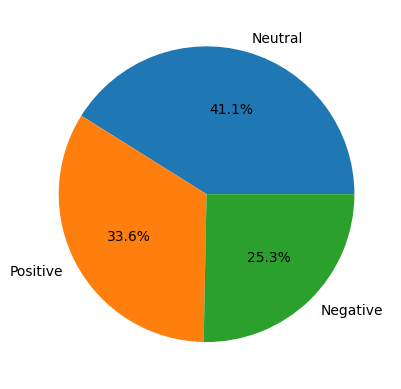

In [72]:
# Percentage of sentiment
plt.pie(df_merge['sentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%.1f%%')
plt.show()

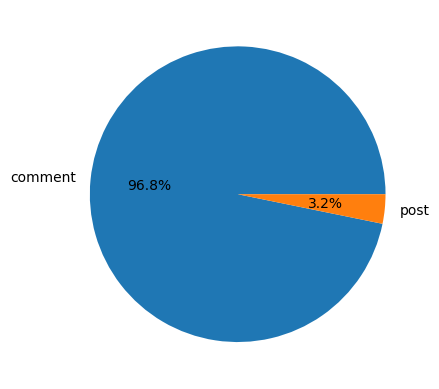

In [73]:
# Percentage of query type for facebook
plt.pie(df_merge['query_type'].value_counts(),labels=['comment','post'],autopct='%.1f%%')
plt.show()

In [74]:
# Group data based on month and year
#grouped = df_merge.groupby('created_time')['text'].count()
grouped = df_merge.groupby(pd.Grouper(key='created_time', freq='M')).size()
grouped

created_time
2022-06-30 00:00:00+00:00     1973
2022-07-31 00:00:00+00:00     3261
2022-08-31 00:00:00+00:00     3456
2022-09-30 00:00:00+00:00     3841
2022-10-31 00:00:00+00:00    10380
2022-11-30 00:00:00+00:00     6729
2022-12-31 00:00:00+00:00     7484
2023-01-31 00:00:00+00:00     4752
2023-02-28 00:00:00+00:00     2841
2023-03-31 00:00:00+00:00     4949
2023-04-30 00:00:00+00:00     2076
2023-05-31 00:00:00+00:00    19865
2023-06-30 00:00:00+00:00    25512
2023-07-31 00:00:00+00:00    14077
2023-08-31 00:00:00+00:00     9297
2023-09-30 00:00:00+00:00    20614
2023-10-31 00:00:00+00:00     1770
dtype: int64

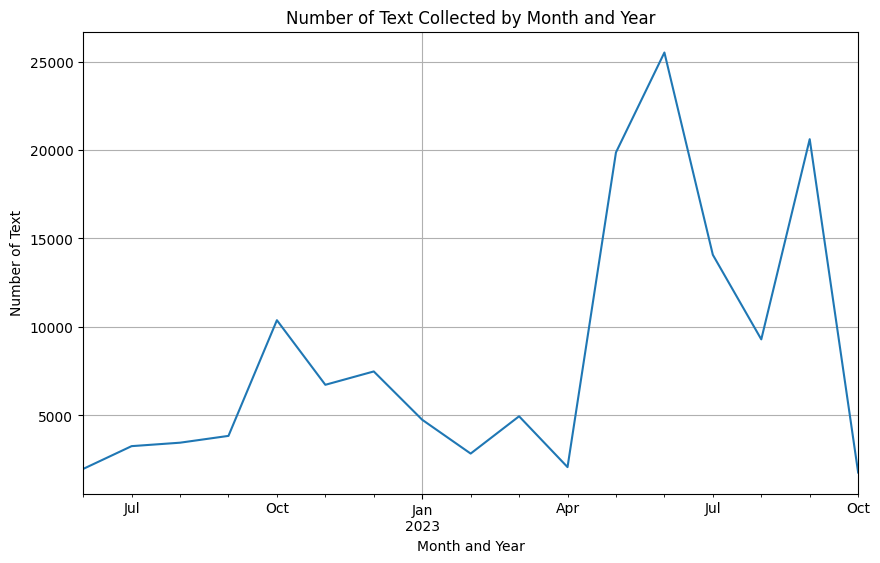

In [75]:
# Plot line chart
grouped.plot(kind='line', figsize=(10, 6))

plt.xlabel('Month and Year')
plt.ylabel('Number of Text')
plt.title('Number of Text Collected by Month and Year')
plt.grid(True)
plt.show()

<ipython-input-99-56b4f3a59d60>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_temp['month_year'] = df_temp['created_time'].dt.to_period('M')
<ipython-input-99-56b4f3a59d60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['month_year'] = df_temp['created_time'].dt.to_period('M')


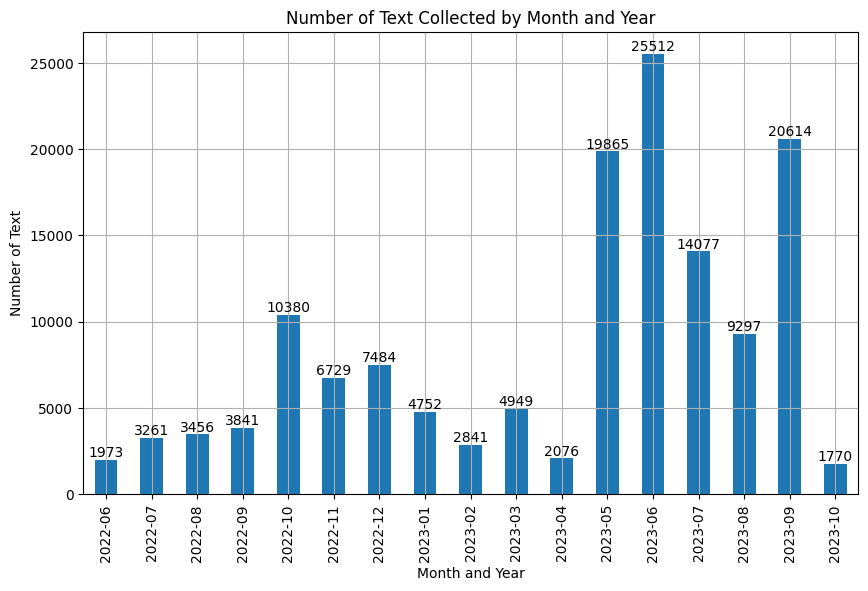

In [99]:
df_merge['created_time'] = pd.to_datetime(df_merge['created_time'])

df_temp = df_merge[['created_time', 'text']]

# Extract month and year
df_temp['month_year'] = df_temp['created_time'].dt.to_period('M')

# Group by 'month_year' and count occurrences
grouped = df_temp.groupby('month_year').size()

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)

plt.xlabel('Month and Year')
plt.ylabel('Number of Text')
plt.title('Number of Text Collected by Month and Year')

# Annotate the bars with counts
for i, v in enumerate(grouped.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.grid(True)
plt.show()


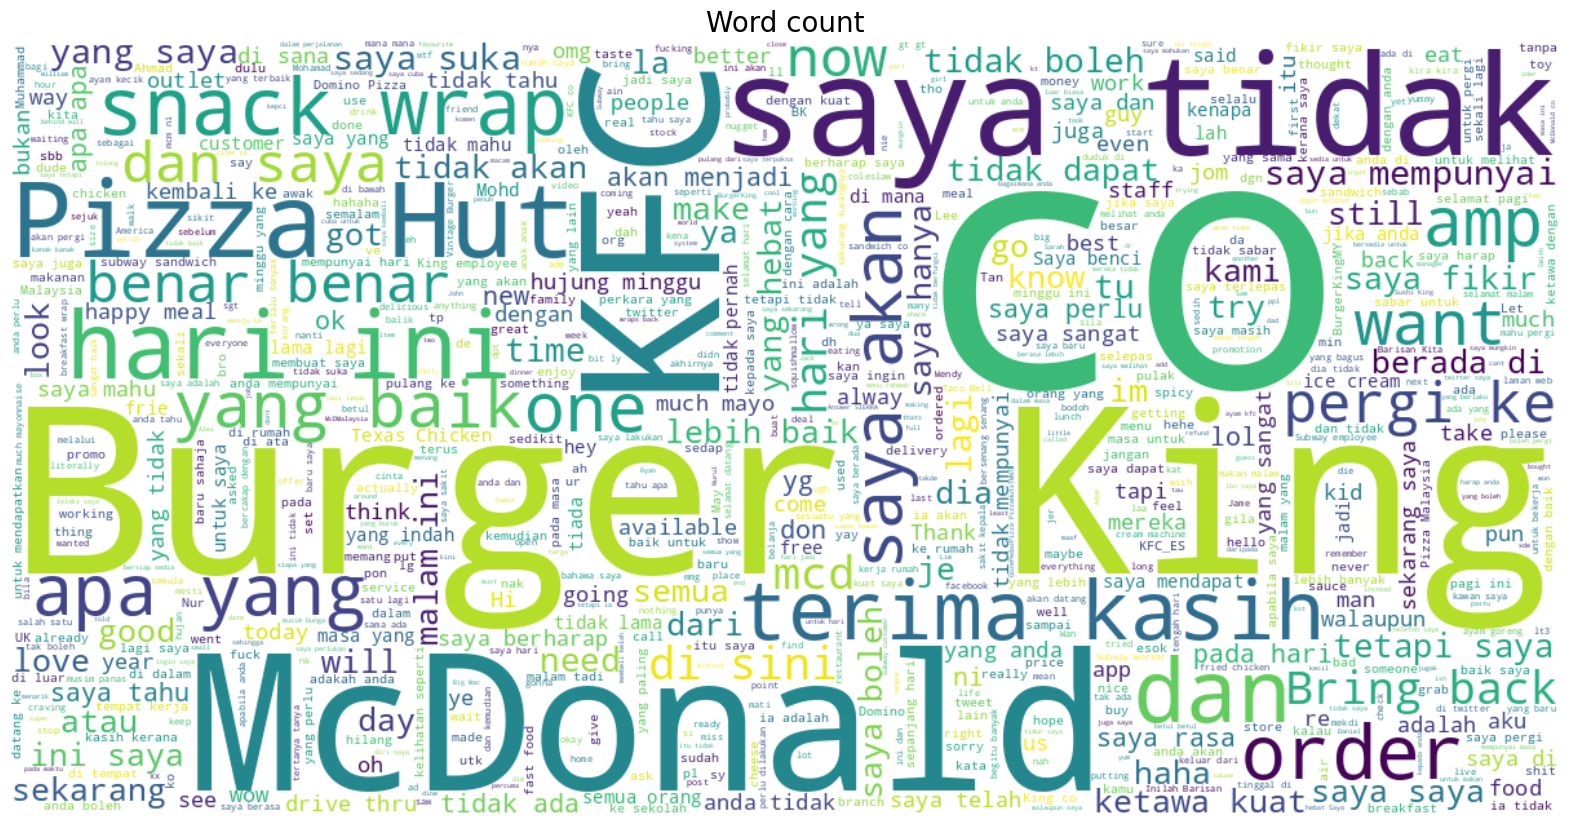

In [80]:
#review = df_merge['text']
#review = df_merge['text'].astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
#review_string = ' '.join(review)
#split = review_string.split()
#cleaned_word = " ".join([string for string in positive_split if 'br' not in string])

review = df_merge['text'].apply(lambda x: str(x))

# remove non-word characters using a regular expression
pattern = r'\w+'
review_string = ' '.join(re.findall(pattern, ' '.join(review)))
cleaned_word = " ".join([word for word in review_string.split()
                            if 'http' not in word
                                and len(word) != 1
                            ])

#plot the words
plt.figure(figsize=(20,20))
wc = WordCloud(stopwords=STOPWORDS, max_words=1200,width = 1200, height=600, background_color= "white").generate(cleaned_word)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count",fontsize=20)
plt.show()

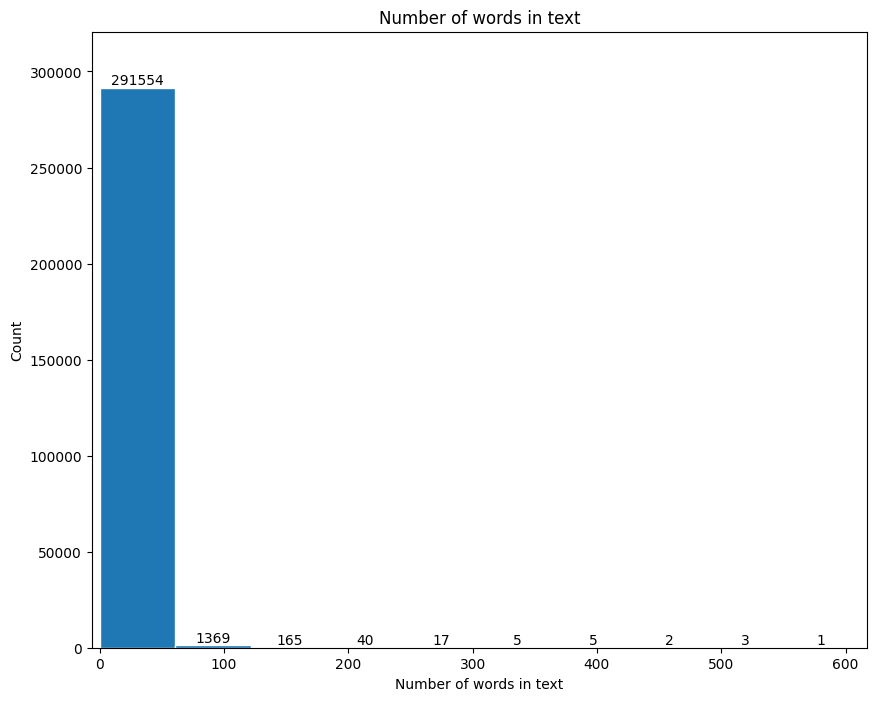

In [93]:
# split each text into a list of words and get the length of each list
split = review.str.split()
text_len = split.map(lambda x: len(x))

plt.figure(figsize=(10,8))
values, bins, bars = plt.hist(text_len, edgecolor='white')
plt.xlabel("Number of words in text")
plt.ylabel("Count")
plt.title('Number of words in text')
plt.bar_label(bars, fontsize=10)
plt.margins(x=0.01, y=0.1)

# Data Preprocessing

In [ ]:
#Convert all string into lower case;
df_merge['cleaned'] = df_merge['text'].str.lower()

# Remove punctuation
#df['review'] =  df['review'].str.replace('[^\w\s]','', regex=True) #[\s\w\d]
df_merge['cleaned'].replace( { r'[^\w\s]','' }, inplace= True, regex = True)

#Remove Hashtags
df_merge['cleaned'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
df_merge['cleaned'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
df_merge['cleaned'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

#Remove numbers
df_merge['cleaned'].replace( { r'[0-9]+' : '' }, inplace= True, regex = True)

# # Remove chinese char and emotions
# pattern = re.compile("["
#                      u"\U0001F600-\U0001F64F"  # emoticons
#                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                      u"\U00002500-\U00002BEF"  # chinese char
#                      "]+", flags=re.UNICODE)

# # remove emoticons from the 'text' column
# df_merge['text'] = df_merge['text'].str.replace(pattern, '')

#Remove Mention
df_merge['cleaned'].replace( { r'\b\w\b' : '' }, inplace= True, regex = True)

#Remove all punctuation
import string

translator = str.maketrans('', '', string.punctuation)
df_merge['cleaned'] = df_merge['cleaned'].apply(lambda x: x.translate(translator))

df_merge.head()

,query_type,text,created_time,source,sentiment,restaurant,cleaned
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29 12:21:49+00:00,facebook,NaN,NaN,keep the party going 🎉 final week to get your ...
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29 13:26:05+00:00,facebook,NaN,NaN,the amount of chillis given by pizzahut for r...
2,comment,Cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN,NaN,cutie piessss ❤️
3,comment,so comel la these 2 kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN,NaN,so comel la these kids 🥰
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30 06:36:10+00:00,facebook,NaN,NaN,can mcdonald pls take action on this google re...


In [ ]:
# Remove stopword and tokenization
from nltk.corpus import stopwords
import time
nltk.download('stopwords')
stwords_eng = set(stopwords.words("english"))
stwords_eng.add('br')

# Remove malay stopword
stwords_bm =set(line.strip() for line in open('/content/drive/MyDrive/MDS Project LimJiaYee/Code/stopword-malay.txt'))

# Tokenization
from nltk.tokenize import RegexpTokenizer

start = time.time()

#df_merge['cleaned'] = ""
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

for i in range(len(df_merge)):
    sentence = str(df_merge['cleaned'].iloc[i])
    tokens = tokenizer.tokenize(sentence)
    words = [w for w in tokens if w not in stwords_eng]
    words = [w for w in words if w not in stwords_bm]
    df_merge['cleaned'].iloc[i] = words

end = time.time()

print("Time for tokenizing:", (end-start))
df_merge.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-79-c530258202e8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['cleaned'].iloc[i] = words


Time for tokenizing: 54.33191132545471


,query_type,text,created_time,source,sentiment,restaurant,cleaned
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29 12:21:49+00:00,facebook,NaN,NaN,"[keep, party, going, 🎉, final, week, get, hand..."
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29 13:26:05+00:00,facebook,NaN,NaN,"[amount, chillis, given, pizzahut, regular, pi..."
2,comment,Cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN,NaN,"[cutie, piessss, ❤️]"
3,comment,so comel la these 2 kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN,NaN,"[comel, la, kids, 🥰]"
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30 06:36:10+00:00,facebook,NaN,NaN,"[mcdonald, pls, take, action, google, reviews,..."


In [ ]:
# Lemmazation

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer,PorterStemmer

lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer()


for i in range(len(df_merge)):
    filtered_words = df_merge['cleaned'].iloc[i]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    df_merge['cleaned'].iloc[i]=[lemmatizer.lemmatize(w) for w in filtered_words] #try malay n chinese

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-80-5f7e084e9904>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['cleaned'].iloc[i]=[lemmatizer.lemmatize(w) for w in filtered_words] #try malay n chinese


In [ ]:
df_merge.head()

,query_type,text,created_time,source,sentiment,restaurant,cleaned
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29 12:21:49+00:00,facebook,NaN,NaN,"[keep, party, going, 🎉, final, week, get, hand..."
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29 13:26:05+00:00,facebook,NaN,NaN,"[amount, chilli, given, pizzahut, regular, piz..."
2,comment,Cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN,NaN,"[cutie, pie, ❤️]"
3,comment,so comel la these 2 kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN,NaN,"[comel, la, kid, 🥰]"
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30 06:36:10+00:00,facebook,NaN,NaN,"[mcdonald, pls, take, action, google, review, ..."


In [ ]:
df_merge.tail()

,query_type,text,created_time,source,sentiment,restaurant,cleaned
992,NaN,aku bg 4 out of 5. ape2 pun citer yang berbalo...,NaT,Dr Dataset,NaN,NaN,"[aku, bg, ape, pun, citer, berbaloi, tonton, c..."
993,NaN,baru jer balik dari nonton mobie nie....rating...,NaT,Dr Dataset,NaN,NaN,"[jer, balik, nonton, mobie, nierating, comment..."
994,NaN,banyak ar scene scene yang lawak ... yang mema...,NaT,Dr Dataset,NaN,NaN,"[ar, scene, scene, lawak, memang, teramat, hum..."
995,NaN,highly entertaining.... kena consentrate betul...,NaT,Dr Dataset,NaN,NaN,"[highly, entertaining, kena, consentrate, betu..."
996,NaN,"aku x tau pepe pon fasal cerite nie, coz x ten...",NaT,Dr Dataset,NaN,NaN,"[aku, tau, pepe, pon, fasal, cerite, nie, coz,..."


In [ ]:
df_merge.to_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/merged_dataset_Project2.csv', index=False)

## Word2vec model

In [ ]:
from gensim.models import Word2Vec

start = time.time()
X = df_merge['cleaned']
model = Word2Vec(X, vector_size=300, window=5, min_count=5, workers=5)
model.wv.save_word2vec_format('/content/drive/MyDrive/MDS Project LimJiaYee/Code/ff_word2vec_Project2.txt', binary= False)
end = time.time()

print("Time for word2vec model:", (end-start))

Time for word2vec model: 28.083662033081055


In [ ]:
model.wv.most_similar(positive=["mcd"])

[('marrybrown', 0.8062634468078613),
 ('outlet', 0.8016941547393799),
 ('branch', 0.7694324254989624),
 ('lotus', 0.7647364139556885),
 ('mekdi', 0.7511820793151855),
 ('kat', 0.7487407922744751),
 ('ipoh', 0.7484287023544312),
 ('tgv', 0.7469120621681213),
 ('aeon', 0.745461642742157),
 ('area', 0.7438245415687561)]

In [ ]:
model.wv.most_similar(positive=["kfc"])

[('mcd', 0.6767134666442871),
 ('marrybrown', 0.644417405128479),
 ('branch', 0.6035505533218384),
 ('outlet', 0.6025423407554626),
 ('mc', 0.581386387348175),
 ('quality', 0.5736242532730103),
 ('standard', 0.5656622052192688),
 ('damansara', 0.5644479990005493),
 ('😡', 0.5581113696098328),
 ('sold', 0.5551035404205322)]

In [ ]:
X

0      [keep, party, going, 🎉, final, week, get, hand...
1      [amount, chilli, given, pizzahut, regular, piz...
2                                       [cutie, pie, ❤️]
3                                    [comel, la, kid, 🥰]
4      [mcdonald, pls, take, action, google, review, ...
                             ...                        
992    [aku, bg, ape, pun, citer, berbaloi, tonton, c...
993    [jer, balik, nonton, mobie, nierating, comment...
994    [ar, scene, scene, lawak, memang, teramat, hum...
995    [highly, entertaining, kena, consentrate, betu...
996    [aku, tau, pepe, pon, fasal, cerite, nie, coz,...
Name: cleaned, Length: 293161, dtype: object

In [ ]:
# Get the vocabulary size
vocab_size = len(model.wv.key_to_index)

# Print the vocabulary size
print('Vocabulary size:', vocab_size)

Vocabulary size: 25103
